In [9]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
data_set=pd.read_csv('Fraud_check.csv')
data_set

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [11]:
data_set.shape

(600, 6)

In [12]:
data_set.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [13]:
data_set.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

*  There is no null values

* The categorical data can be coverted into numeric data type by using encoder.so that the model can learn more easily

### Data preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
data_set['Undergrad']=le.fit_transform(data_set['Undergrad'])
data_set['Marital.Status']=le.fit_transform(data_set['Marital.Status'])
data_set['Urban']=le.fit_transform(data_set['Urban'])
data_set.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

In [16]:
data_set.insert(6,'tax_category','')
data_set

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,
596,1,0,69967,55369,2,1,
597,0,0,47334,154058,0,1,
598,1,1,98592,180083,17,0,


#### Converting taxable income to category of 0 and 1 

In [17]:
for i in range(0,len(data_set['tax_category']),1):
    if data_set['Taxable.Income'][i]<=30000:
        data_set['tax_category'][i]='0'
    else:
        data_set['tax_category'][i]='1'

In [18]:
data_set['tax_category'].unique()

array(['1', '0'], dtype=object)

### Model Building

In [19]:
x=data_set.loc[:,('Undergrad','Marital.Status','City.Population','Work.Experience','Urban')]
y=data_set['tax_category']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Model Training

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(x_train,y_train)

### Model Testing

In [22]:
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)

### Model evaluation

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [24]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.11      0.05      0.06        22
           1       0.81      0.92      0.86        98

    accuracy                           0.76       120
   macro avg       0.46      0.48      0.46       120
weighted avg       0.68      0.76      0.72       120



In [25]:
print(accuracy_score(y_test,y_pred_test))

0.7583333333333333


In [26]:
print(confusion_matrix(y_test,y_pred_test))

[[ 1 21]
 [ 8 90]]


<AxesSubplot:>

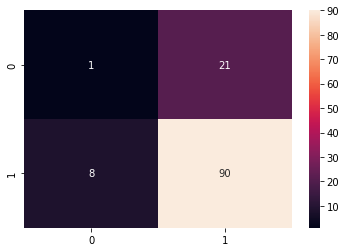

In [27]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_test,annot=True)

In [28]:
auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

auc value for test data 0.4819109461966605


In [29]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators' : [20,50,70,100,150]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 50}
0.7895833333333333


In [30]:
rf_model_tweak=RandomForestClassifier( n_estimators=50,min_samples_split=8,max_depth=8,min_samples_leaf=2).fit(x_train,y_train)

In [35]:
y_pred_test_tweak=rf_model_tweak.predict(x_test)

In [36]:
print(classification_report(y_test,y_pred_test_tweak))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.82      0.99      0.89        98

    accuracy                           0.81       120
   macro avg       0.41      0.49      0.45       120
weighted avg       0.67      0.81      0.73       120



In [37]:
print(accuracy_score(y_test,y_pred_test_tweak))

0.8083333333333333


In [38]:
auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

auc value for test data 0.49489795918367346


<AxesSubplot:>

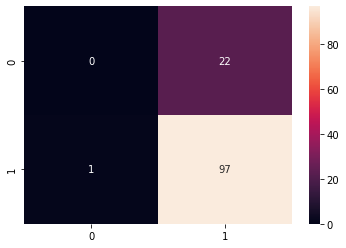

In [39]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test_tweak)
sns.heatmap(confusion_matrix_test,annot=True)